# Haplotype Summary

In [1]:
# Import packages.
import analysis_functions as af
import allel
import numpy as np
import pandas as pd
# Print version numbers.
print('allel', allel.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)

allel 1.3.5
numpy 1.22.3
pandas 1.4.2


In [2]:
# Intialize my pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load in the meta information as a pandas dataframe.
tgp_df = pd.read_csv(
    '../meta_data/tgp_mod_arc.txt', sep='\t',
    names=['IND', 'POP', 'SUPERPOP'],
)
# Intialize an ordered dictionary.
tgp_dicc = {
    'AFR': ['LWK', 'GWD', 'MSL', 'ESN', 'YRI'],
    'SAS': ['BEB', 'STU', 'ITU', 'PJL', 'GIH'],
    'EAS': ['CHB', 'KHV', 'CHS', 'JPT', 'CDX'],
    'EUR': ['TSI', 'CEU', 'IBS', 'GBR', 'FIN'],
    'AMR': ['PEL', 'MXL', 'CLM', 'PUR'],
}
# Intialize a samples dictionary.
idx_dicc = {}
# For every superpopulation.
for s_pop in tgp_dicc.keys():
    # Fill the dictionary.
    idx_dicc[s_pop] = tgp_df[tgp_df['SUPERPOP'] == s_pop].index.values
    # For every population.
    for pop in tgp_dicc[s_pop]:
        # Fill the dictionary.
        idx_dicc[pop] = tgp_df[tgp_df['POP'] == pop].index.values

## 72kb Region

In [4]:
# Load the genotype matricies.
tgp_72kb_gt, tgp_72kb_pos = af.load_hap_region('tgp_mod_arc_anc', 12, 40758000, 40830000)
sgdp_72kb_gt, sgdp_72kb_pos = af.load_hap_region('sgdp_arc_anc', 12, 40758000, 40830000)
# Polarize the genotype matricies.
tgp_72kb_p_gt = af.polarize_gt(tgp_72kb_gt)
sgdp_72kb_p_gt = af.polarize_gt(sgdp_72kb_gt)

### TGP

In [5]:
# Compile the archaic-specific snp density results
af.compile_tgp_arc_snp_denisty_summary(tgp_72kb_gt, 72)

,Archaic,SNP Type,$MUC19$ (Archaic SNP Denisty),Nonoverlapping Windows $\left( \mu \right)$,Nonoverlapping Windows $\left( \sigma \right)$,$P-value$
0,Denisovan,Derived,84,1.986709,3.834724,<3.242e-05
1,Denisovan,Ancestral,65,0.265180,1.374136,<3.242e-05
2,Neanderthal,Derived,5,8.768373,8.613168,0.590332933510552
3,Neanderthal,Ancestral,0,0.618666,2.353438,>0.999968


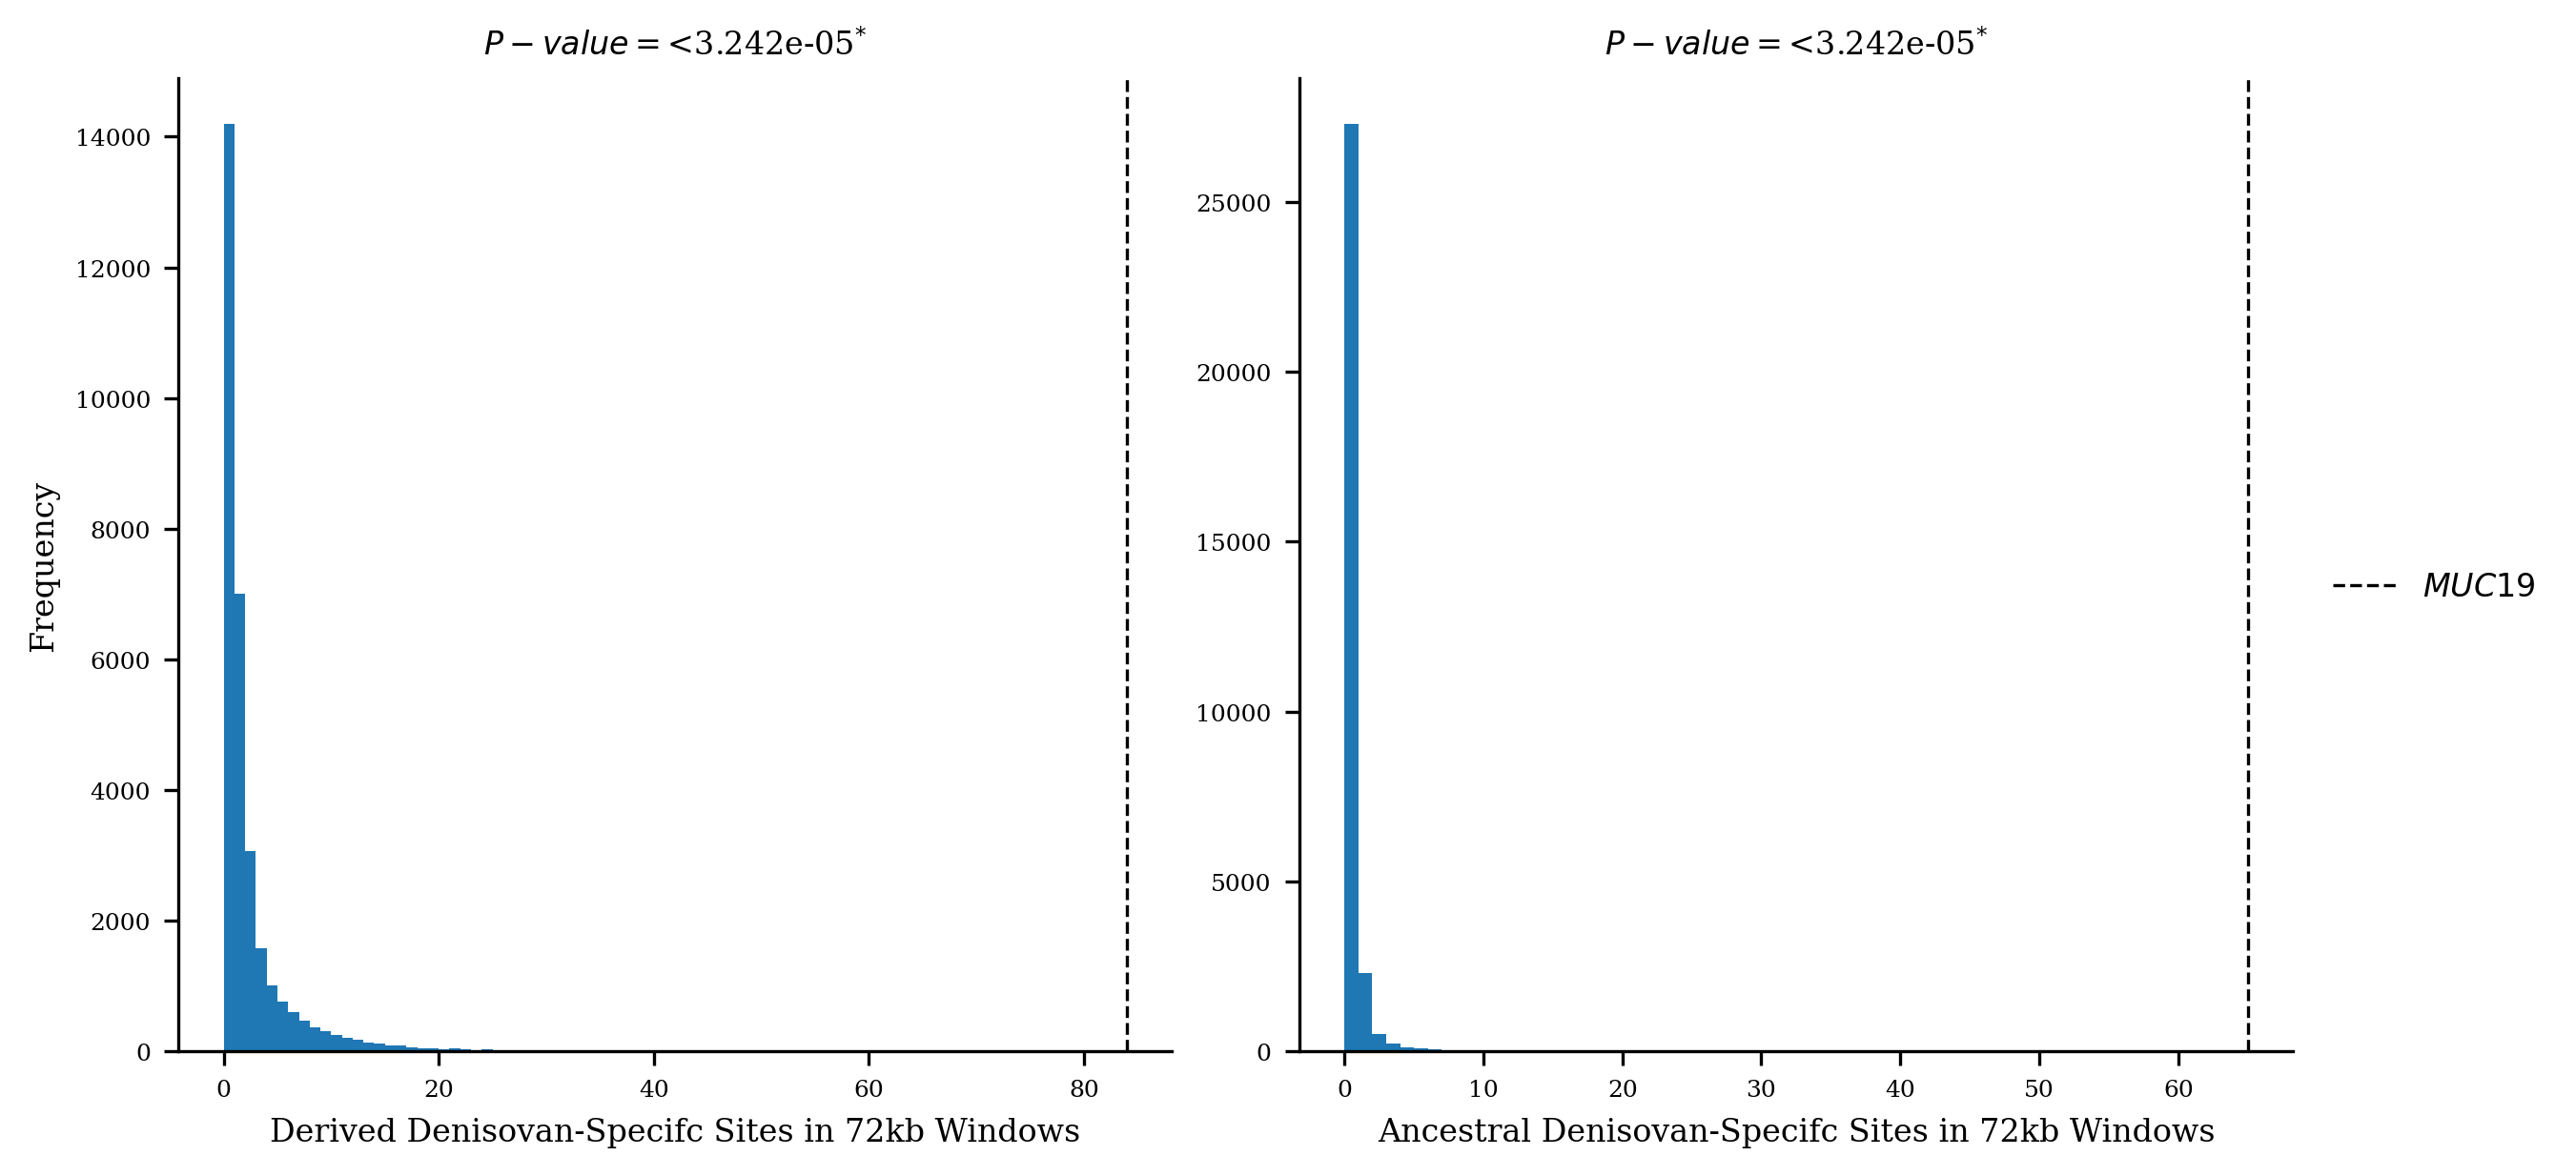

In [6]:
# Plot the Denisovan-specific snp density.
af.plot_tgp_arc_snp_denisty_summary(tgp_72kb_gt, 'DEN', r'$MUC19$', 72)

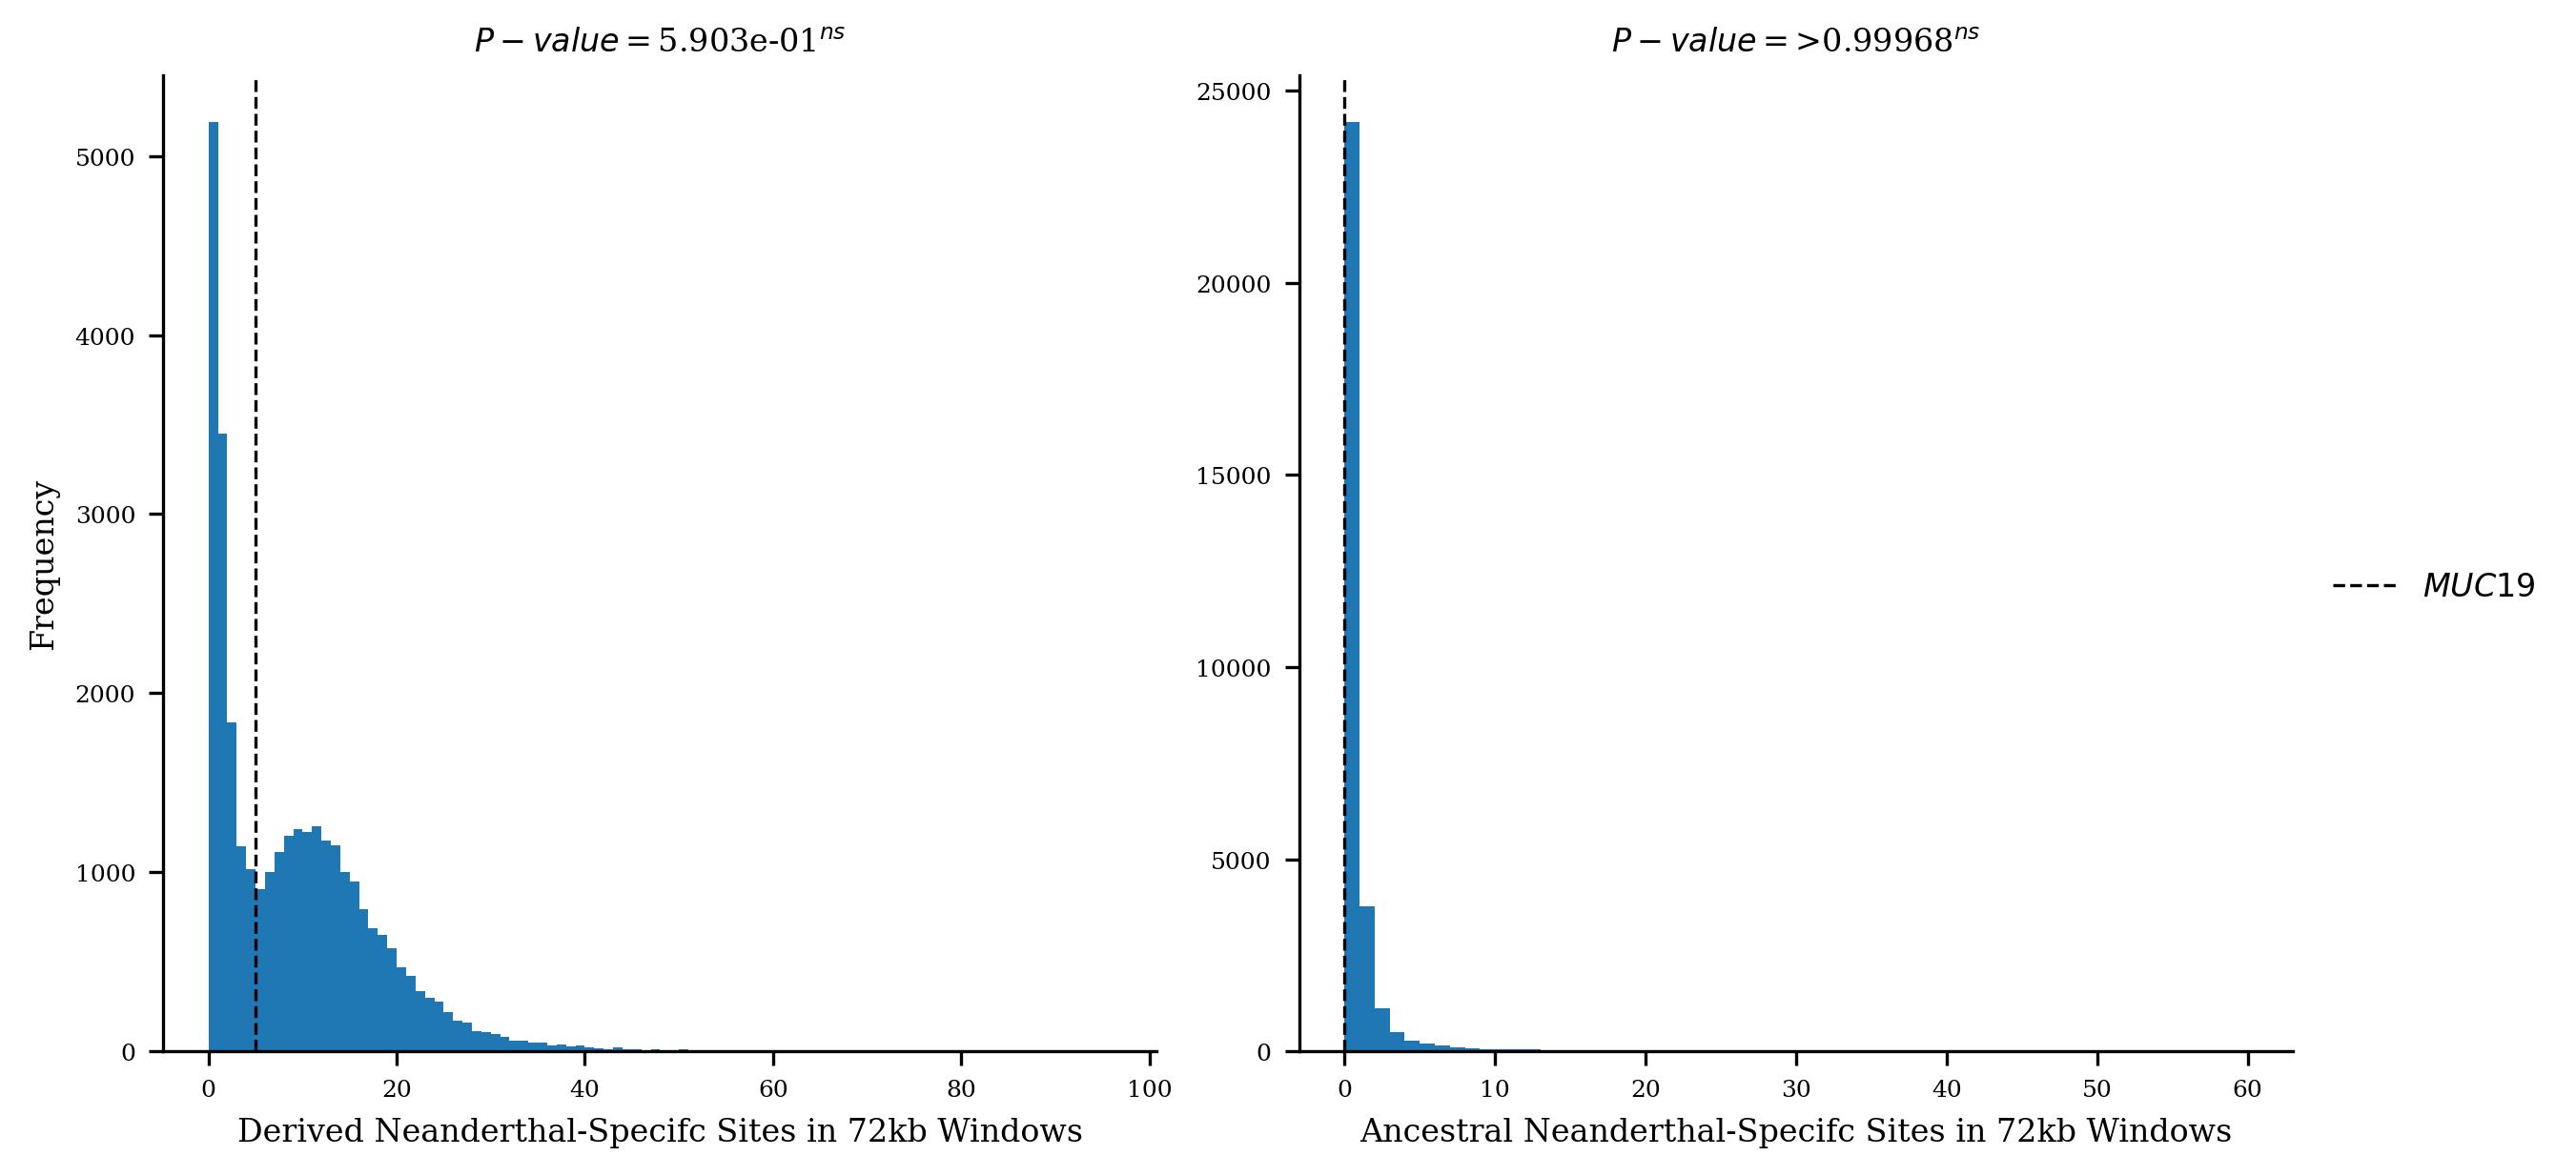

In [7]:
# Plot the Neanderthal-specific snp density.
af.plot_tgp_arc_snp_denisty_summary(tgp_72kb_gt, 'NEA', r'$MUC19$', 72)

In [8]:
# Compile the haplotype distance summary.
tgp_72kb_abs_dist_df, tgp_72kb_norm_dist_df, tgp_72kb_dist_dicc = af.tgp_haplotype_distances(tgp_72kb_p_gt, 72)

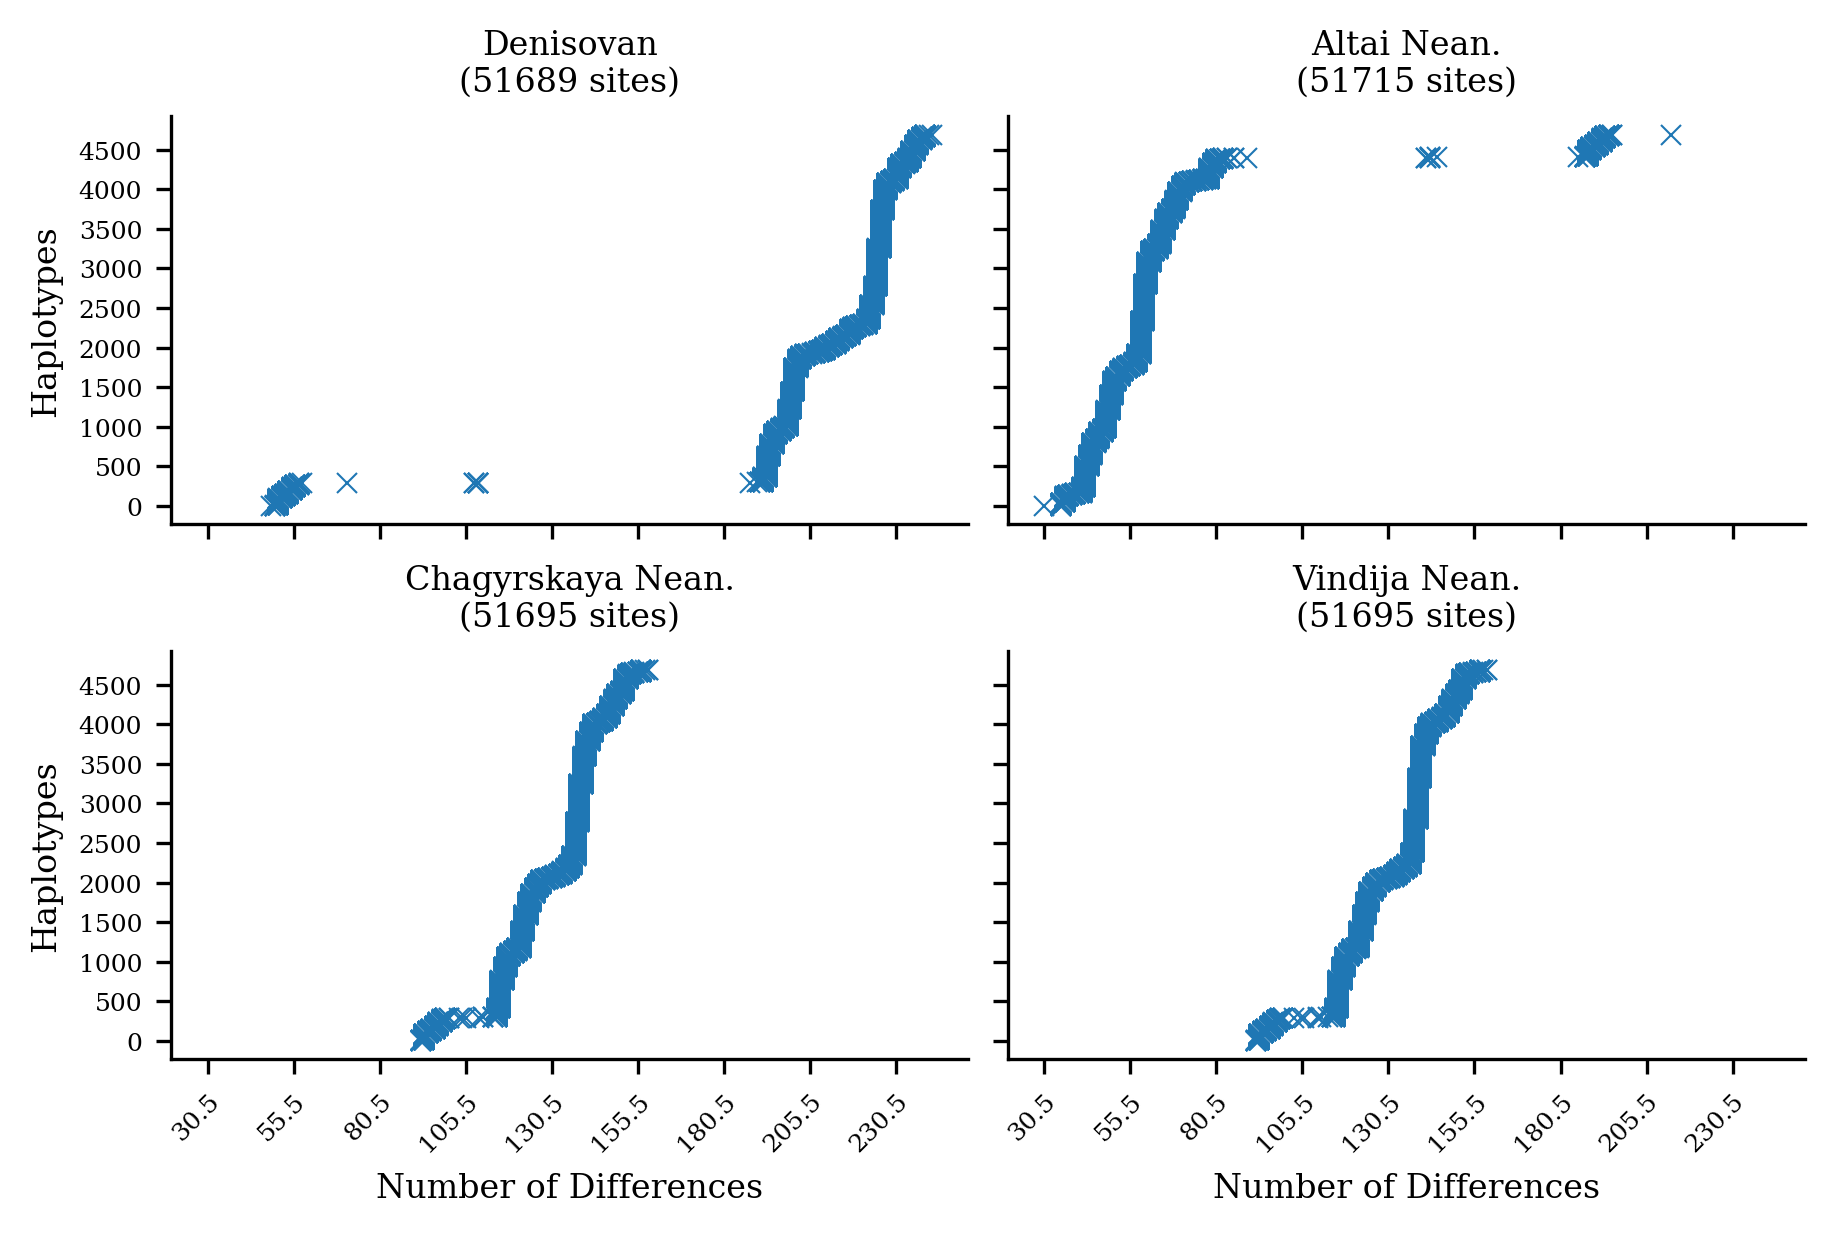

In [9]:
# Plot the s-curve for the tgp data.
af.tgp_plot_s_curves(tgp_72kb_dist_dicc, 72)

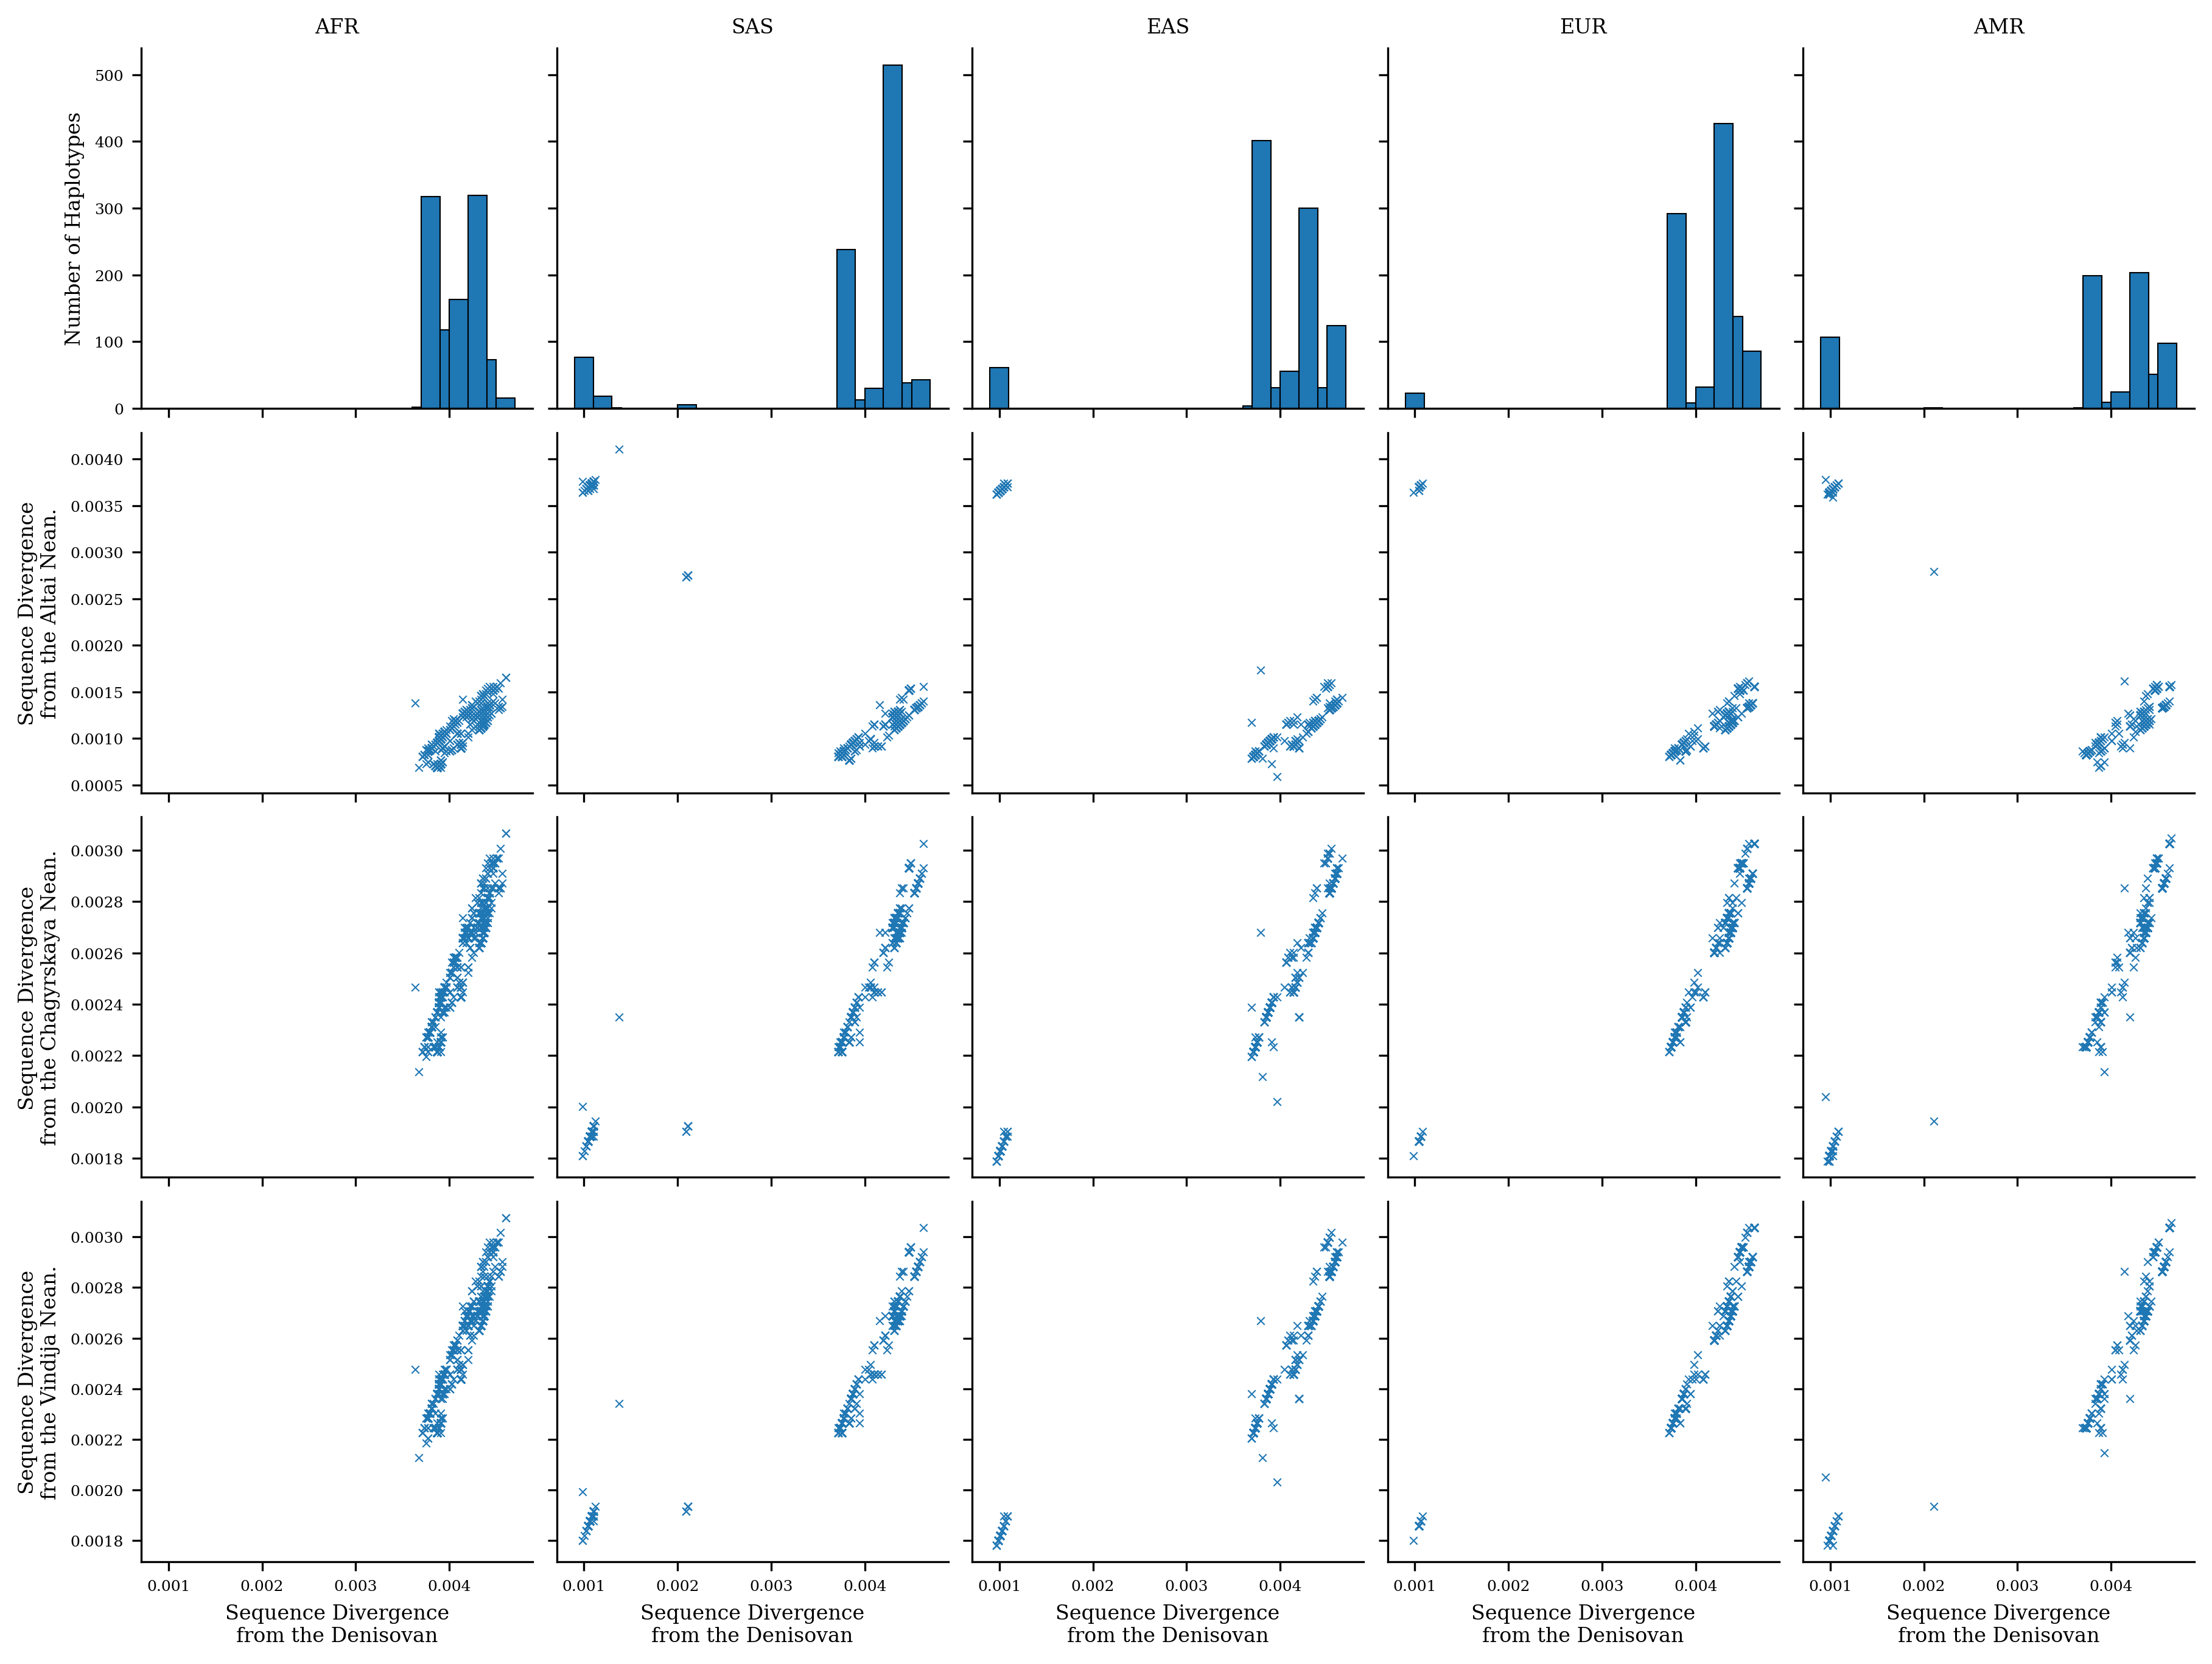

In [10]:
# Plot the haplotype distance summary for the tgp.
af.plot_den_hap_dist_summary(tgp_72kb_norm_dist_df, 72)

In [11]:
# Compile the tgp den-like haplotype summary.
tgp_pop_72kb_den_hap_df, tgp_spop_72kb_den_hap_df, tgp_72kb_den_dicc = af.tgp_hap_freq_summary(tgp_72kb_dist_dicc, 'DEN', 80.5, 72)

In [12]:
# Show the tgp population results.
tgp_pop_72kb_den_hap_df

,Super Population,Population,Total Haplotypes,Haplotype Frequency,Homozygous Individuals,Heterozygous Individuals
0,AFR,LWK,0,0.000000,0,0
1,AFR,GWD,0,0.000000,0,0
2,AFR,MSL,0,0.000000,0,0
3,AFR,ESN,0,0.000000,0,0
4,AFR,YRI,0,0.000000,0,0
5,SAS,BEB,24,0.139535,2,20
6,SAS,STU,23,0.112745,0,23
7,SAS,ITU,21,0.102941,1,19
8,SAS,PJL,10,0.052083,1,8
9,SAS,GIH,18,0.087379,0,18


In [13]:
# Show the tgp superpopulation results.
tgp_spop_72kb_den_hap_df

,Super Population,Total Haplotypes,Haplotype Frequency,Homozygous Individuals,Heterozygous Individuals
0,AFR,0,0.000000,0,0
1,SAS,96,0.098160,4,88
2,EAS,61,0.060516,0,61
3,EUR,23,0.022863,0,23
4,AMR,107,0.154179,12,83


In [14]:
# # Intailzie an empty array.
# all_het_idx_72kb = np.array([])
# all_hom_idx_72kb = np.array([])
# # For all super populations...
# for s_pop in ['SAS', 'EAS', 'EUR', 'AMR']:
#     # Fill the arrays.
#     all_het_idx_72kb = np.append(all_het_idx_72kb, tgp_72kb_den_dicc[s_pop]['het_idx'])
#     all_hom_idx_72kb = np.append(all_hom_idx_72kb, tgp_72kb_den_dicc[s_pop]['hom_idx'])
#     # Extract the introgressed individual indices.
#     spop_int_idx = tgp_72kb_den_dicc[s_pop]['int_idx']
#     # Extract the non-introgressed individual indicies.
#     spop_not_idx = np.setdiff1d(idx_dicc[s_pop], spop_int_idx)
# # Export the all samples results.
# np.savetxt(
#     '../meta_data/72kb_all_het_int_idx.csv',
#     [np.sort(all_het_idx_72kb)], fmt='%d', delimiter=',',
# )
# np.savetxt(
#     '../meta_data/72kb_all_hom_int_idx.csv',
#     [np.sort(all_hom_idx_72kb)], fmt='%d', delimiter=',',
# )

In [15]:
# # Extract the sample indicies for all tgp individuals.
# tgp_idx = tgp_72kb_abs_dist_df.index.values
# # Extract the haplotype distance arrays.
# hap_1_dists = tgp_72kb_abs_dist_df['Hap. 1 (DEN)'].values
# hap_2_dists = tgp_72kb_abs_dist_df['Hap. 2 (DEN)'].values
# # Determine the indicies of the Denisovan-like haplotypes.
# den_hap_1_idx = np.where(hap_1_dists < 80.5)[0]
# den_hap_2_idx = np.where(hap_2_dists < 80.5)[0]
# # Determine the indicies of the recombinant haplotypes.
# rec_hap_1_idx = np.where((hap_1_dists > 80.5) & (hap_1_dists < 130.5))[0]
# rec_hap_2_idx = np.where((hap_2_dists > 80.5) & (hap_2_dists < 130.5))[0]
# # Determine the indicies of the human-like haplotypes.
# hum_hap_1_idx = np.setdiff1d(
#     tgp_idx,
#     np.concatenate((den_hap_1_idx, rec_hap_1_idx))
# )
# hum_hap_2_idx = np.setdiff1d(
#     tgp_idx,
#     np.concatenate((den_hap_2_idx, rec_hap_2_idx))
# )
# # Export the haplotype groups.
# np.savetxt(
#     f'../meta_data/72kb_arc_like_hap_1_idx.csv',
#     [den_hap_1_idx], fmt='%d', delimiter=',', newline='\n',
# )
# np.savetxt(
#     f'../meta_data/72kb_arc_like_hap_2_idx.csv',
#     [den_hap_2_idx], fmt='%d', delimiter=',', newline='\n',
# )
# np.savetxt(
#     f'../meta_data/72kb_hum_like_hap_1_idx.csv',
#     [hum_hap_1_idx], fmt='%d', delimiter=',', newline='\n',
# )
# np.savetxt(
#     f'../meta_data/72kb_hum_like_hap_2_idx.csv',
#     [hum_hap_2_idx], fmt='%d', delimiter=',', newline='\n',
# )
# np.savetxt(
#     f'../meta_data/72kb_rec_like_hap_1_idx.csv',
#     [rec_hap_1_idx], fmt='%d', delimiter=',', newline='\n',
# )
# np.savetxt(
#     f'../meta_data/72kb_rec_like_hap_2_idx.csv',
#     [rec_hap_2_idx], fmt='%d', delimiter=',', newline='\n',
# )
# np.savetxt(
#     '../meta_data/72kb_all_rec_int_idx.csv',
#     [np.sort(np.concatenate((rec_hap_1_idx, rec_hap_2_idx)))], fmt='%d', delimiter=',',
# )

In [16]:
# Compile the pairwise sequence divergence between haplogroup results.
af.compile_haplo_group_pwd_div_summary(tgp_72kb_p_gt, 72)

,Haplotype Group 1,Haplotype Group 2,$MUC19$ (Pairwise Differences),$MUC19$ (Sequence Divergence),Nonoverlapping Windows ($\mu$),Nonoverlapping Windows ($\sigma$),$P-value$
0,$Denisovan-like$ Hap.,Denisovan,53.313589,0.001031,0.001426,0.000553,0.2395694881187798
1,$Denisovan-like$ Hap.,Altai Nean.,190.754355,0.003689,0.001374,0.000542,0.9970823742989594
2,$Denisovan-like$ Hap.,Chagyrskaya Nean.,95.883275,0.001855,0.001378,0.000538,0.8415080883068046
3,$Denisovan-like$ Hap.,Vindija Nean.,95.407666,0.001846,0.001390,0.000540,0.8321068499367847
4,$Human-like$ Hap.,Denisovan,215.310227,0.004165,0.001428,0.000548,0.9985087690861348
5,$Human-like$ Hap.,Altai Nean.,56.841818,0.001099,0.001378,0.000536,0.3285570720005187
6,$Human-like$ Hap.,Chagyrskaya Nean.,132.810682,0.002569,0.001383,0.000533,0.9694946023924531
7,$Human-like$ Hap.,Vindija Nean.,133.150455,0.002576,0.001395,0.000534,0.9693649301390735
8,$Denisovan-like$ Hap.,$Human-like$ Hap.,218.340244,0.004222,0.000830,0.000356,0.9999675819366551
9,$Denisovan-like$ Hap.,$Denisovan-like$ Hap.,5.935777,0.000115,0.000773,0.000350,0.0029500437643855157


### Papuans

In [17]:
# Compile the haplotype distance summary.
pap_72kb_abs_dist_df, pap_72kb_norm_dist_df, pap_72kb_dist_dicc = af.pap_haplotype_distances(sgdp_72kb_p_gt, 72)

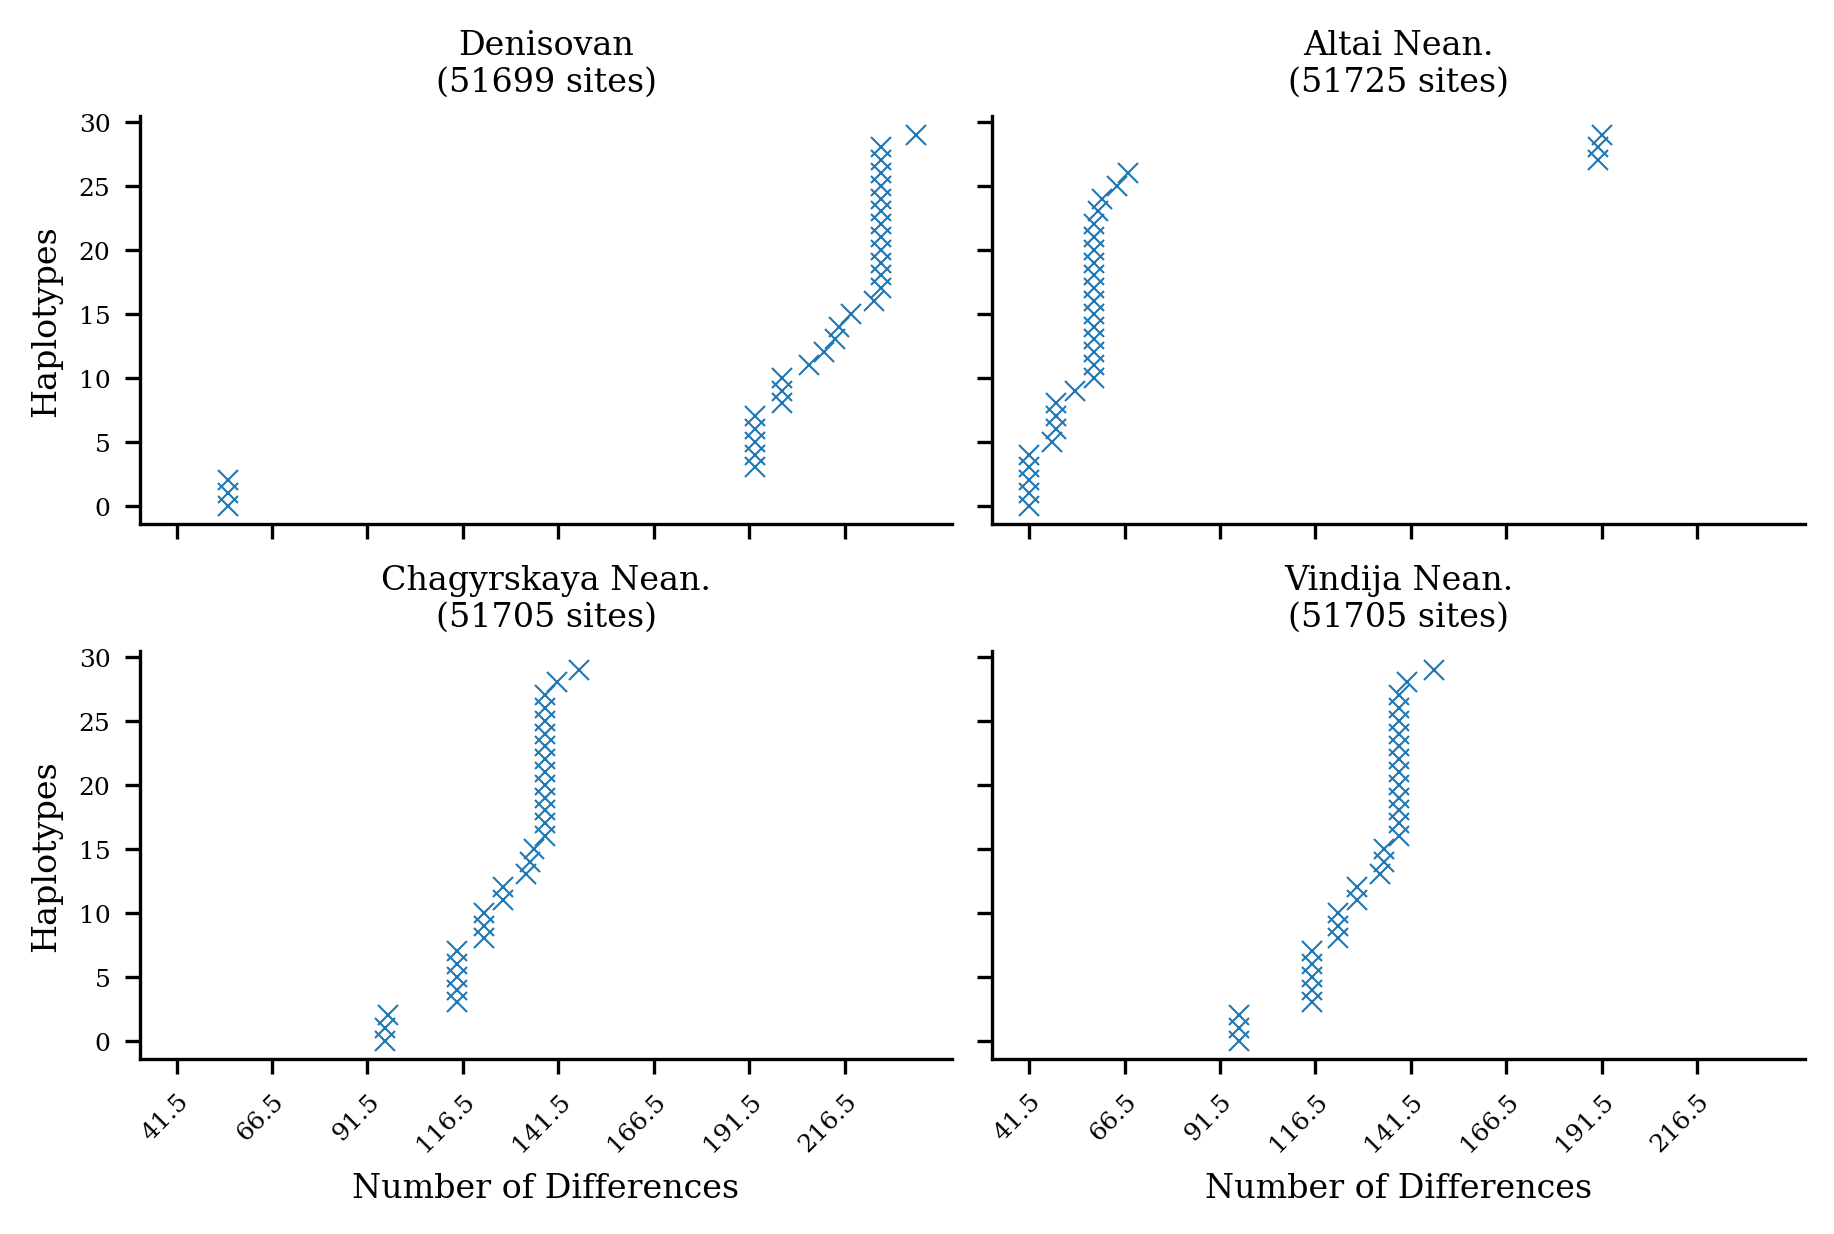

In [18]:
# Plot the s-curve for the papuan data.
af.pap_plot_s_curves(pap_72kb_dist_dicc, 72)

In [19]:
# Compile the papuan den-like haplotype summary.
af.pap_hap_freq_summary(pap_72kb_dist_dicc, 'DEN', 66.5, 72)

,Super Population,Population,Total Haplotypes,Haplotype Frequency,Homozygous Individuals,Heterozygous Individuals
0,MSEA,PNG,3,0.1,1,1


## 748kb Region

In [20]:
# Import the genotype matrix.
tgp_748kb_gt, tgp_748kb_pos = af.load_hap_region('tgp_mod_arc_anc', 12, 40269000, 41017000)
# Polarize the genotype matrix.
tgp_748kb_p_gt = af.polarize_gt(tgp_748kb_gt)

In [21]:
# Show the results for the MXL individual who has the longest inferred introgressed tract.
af.compile_hap_div_summary(tgp_748kb_p_gt, 'NA19789', 748)

,Individual,Population,Archaic,748kb (Pairwise Differences Hap. 1),748kb (Pairwise Differences Hap. 2),748kb (Sequence Divergence Hap. 1),748kb (Sequence Divergence Hap. 2),Nonoverlapping Windows ($\mu$ Hap. 1),Nonoverlapping Windows ($\mu$ Hap. 2),Nonoverlapping Windows ($\sigma$ Hap. 1),Nonoverlapping Windows ($\sigma$ Hap. 2),$P-value$ (Hap. 1),$P-value$ (Hap. 2)
0,NA19789,MXL,Denisovan,724.5,437.5,0.001357,0.000819,0.001424,0.001421,0.000335,0.000332,0.446501,0.017258
1,NA19789,MXL,Altai Nean.,669.0,478.0,0.001252,0.000895,0.001372,0.001368,0.000335,0.000334,0.382805,0.048949
2,NA19789,MXL,Chagyrskaya Nean.,758.5,351.5,0.001421,0.000658,0.001377,0.001372,0.000335,0.000334,0.606840,0.005648
3,NA19789,MXL,Vindija Nean.,764.5,356.5,0.001432,0.000668,0.001389,0.001384,0.000336,0.000335,0.606213,0.006903
